## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [1]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

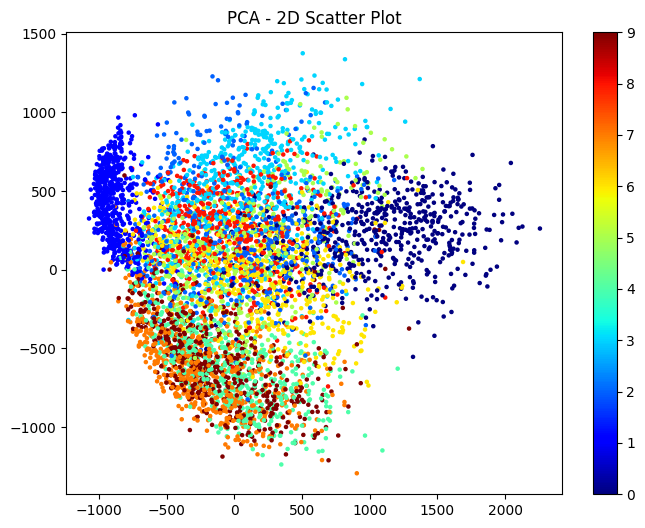

In [2]:
# Your code here

# Importing the required libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Using PCA to reduce the data set
pca = PCA(n_components=2)
X_mnist_reduced = pca.fit_transform(X_mnist_train)

# Visualizing the result with a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_mnist_reduced[:, 0], X_mnist_reduced[:, 1], c=y_mnist_train, cmap='jet', s=5)
plt.colorbar()
plt.title("PCA - 2D Scatter Plot")
plt.show()

#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

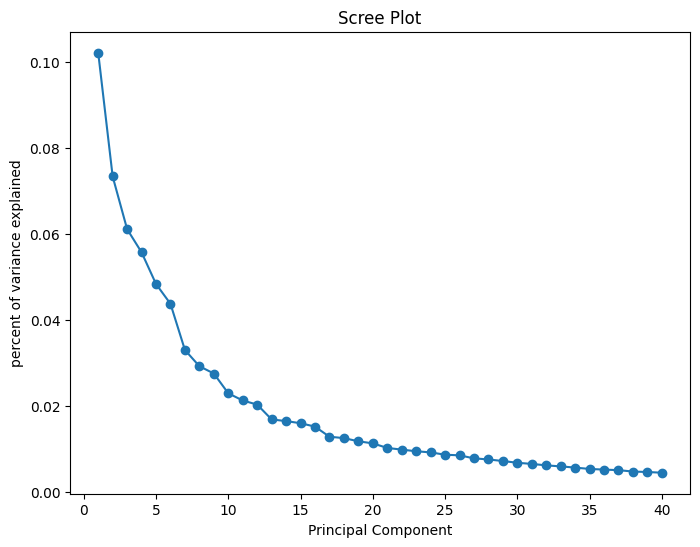

In [3]:
# Your code here

# Applying PCA to all components to get variance explained
pca_full = PCA()
pca_full.fit(X_mnist_train)

# Plotting a Scree Plot for the first 40 components
plt.figure(figsize=(8, 6))
plt.plot(range(1, 41), pca_full.explained_variance_ratio_[:40], marker='o')
plt.xlabel('Principal Component')
plt.ylabel('percent of variance explained')
plt.title('Scree Plot')
plt.show()


#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [4]:
# Your code here

# Calculating the cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Finding the number of components required to explain 95% of the variance
n_components_95_variance = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components required to explain 95% of the variance: {n_components_95_variance}")


Number of components required to explain 95% of the variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

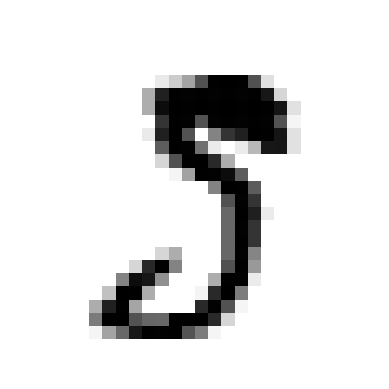

In [5]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

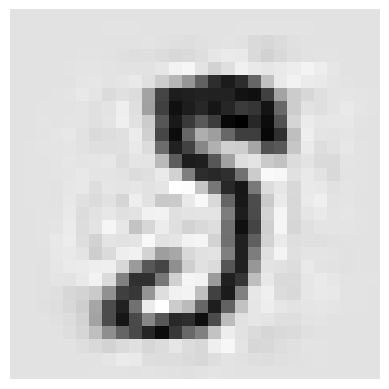

In [6]:
# Your code here

# Reducing the dimensions using the identified number of components in step 4
pca_95 = PCA(n_components=n_components_95_variance)
X_reduced_95 = pca_95.fit_transform(X_mnist_train)

# Reconstructing the digit
X_reconstructed_95 = pca_95.inverse_transform(X_reduced_95)

# Visualizing the reconstructed digit
plot_mnist_digit(X_reconstructed_95[0])

### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [7]:
# Your code here

# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Training KNN with PCA preserving 80% variance
pca_80 = PCA(n_components=0.80)
X_train_pca_80 = pca_80.fit_transform(X_mnist_train)
X_test_pca_80 = pca_80.transform(X_mnist_test)

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca_80, y_mnist_train)
y_pred_pca = knn_pca.predict(X_test_pca_80)
print(f"Accuracy with PCA (80% variance): {accuracy_score(y_mnist_test, y_pred_pca)}")

# Training KNN without PCA
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print(f"Accuracy without PCA: {accuracy_score(y_mnist_test, y_pred)}")


Accuracy with PCA (80% variance): 0.9528571428571428
Accuracy without PCA: 0.9421428571428572


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

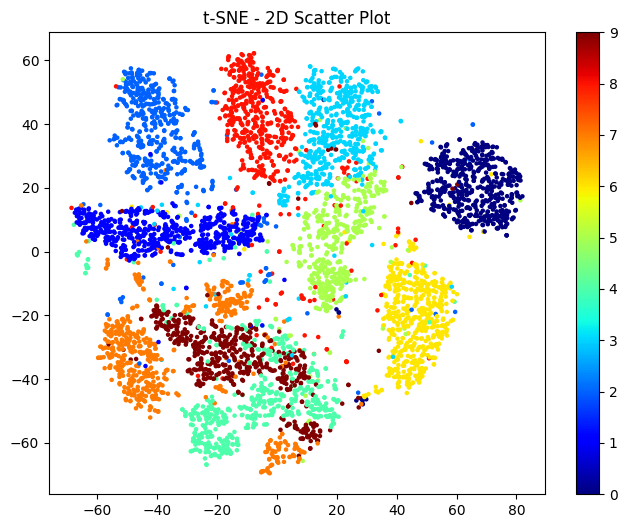

In [8]:
# Your code here

# Importing the required library
from sklearn.manifold import TSNE

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_mnist_train)

# Visualizing t-SNE output
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_mnist_train, cmap='jet', s=5)
plt.colorbar()
plt.title("t-SNE - 2D Scatter Plot")
plt.show()



2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [9]:
# Your code here

# Training KNN on t-SNE transformed data
knn_tsne = KNeighborsClassifier()
knn_tsne.fit(X_tsne, y_mnist_train)
X_test_tsne = tsne.fit_transform(X_mnist_test)
y_pred_tsne = knn_tsne.predict(X_test_tsne)
print(f"KNN accuracy with t-SNE: {accuracy_score(y_mnist_test, y_pred_tsne)}")


KNN accuracy with t-SNE: 0.4421428571428571


In [ ]:
#Comments:
# t-SNE effectively separates the MNIST digit classes into distinct clusters, surpassing PCA in visual clarity.
# KNN accuracy with t-SNE (44.21%) is lower than with PCA (95.29%) or the original data (94.21%).
# t-SNE is great for visual clustering but struggles with classification tasks like KNN due to its emphasis on local structures.

## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [10]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

%pip install numpy==2.0
%pip install umap-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


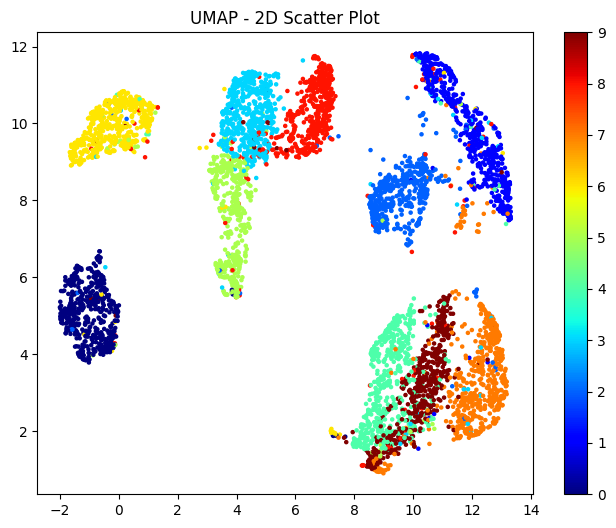

In [11]:
# Your code here

import umap

# Applying UMAP for dimensionality reduction
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_mnist_train)

# Visualizing UMAP output
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_mnist_train, cmap='jet', s=5)
plt.colorbar()
plt.title("UMAP - 2D Scatter Plot")
plt.show()

Now, calculate accuracy with KNN.

In [12]:
# Your code here

# Training KNN on UMAP transformed data
knn_umap = KNeighborsClassifier()
knn_umap.fit(X_umap, y_mnist_train)
X_test_umap = umap_model.transform(X_mnist_test)
y_pred_umap = knn_umap.predict(X_test_umap)
print(f"KNN accuracy after UMAP: {accuracy_score(y_mnist_test, y_pred_umap)}")




KNN accuracy after UMAP: 0.8857142857142857


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


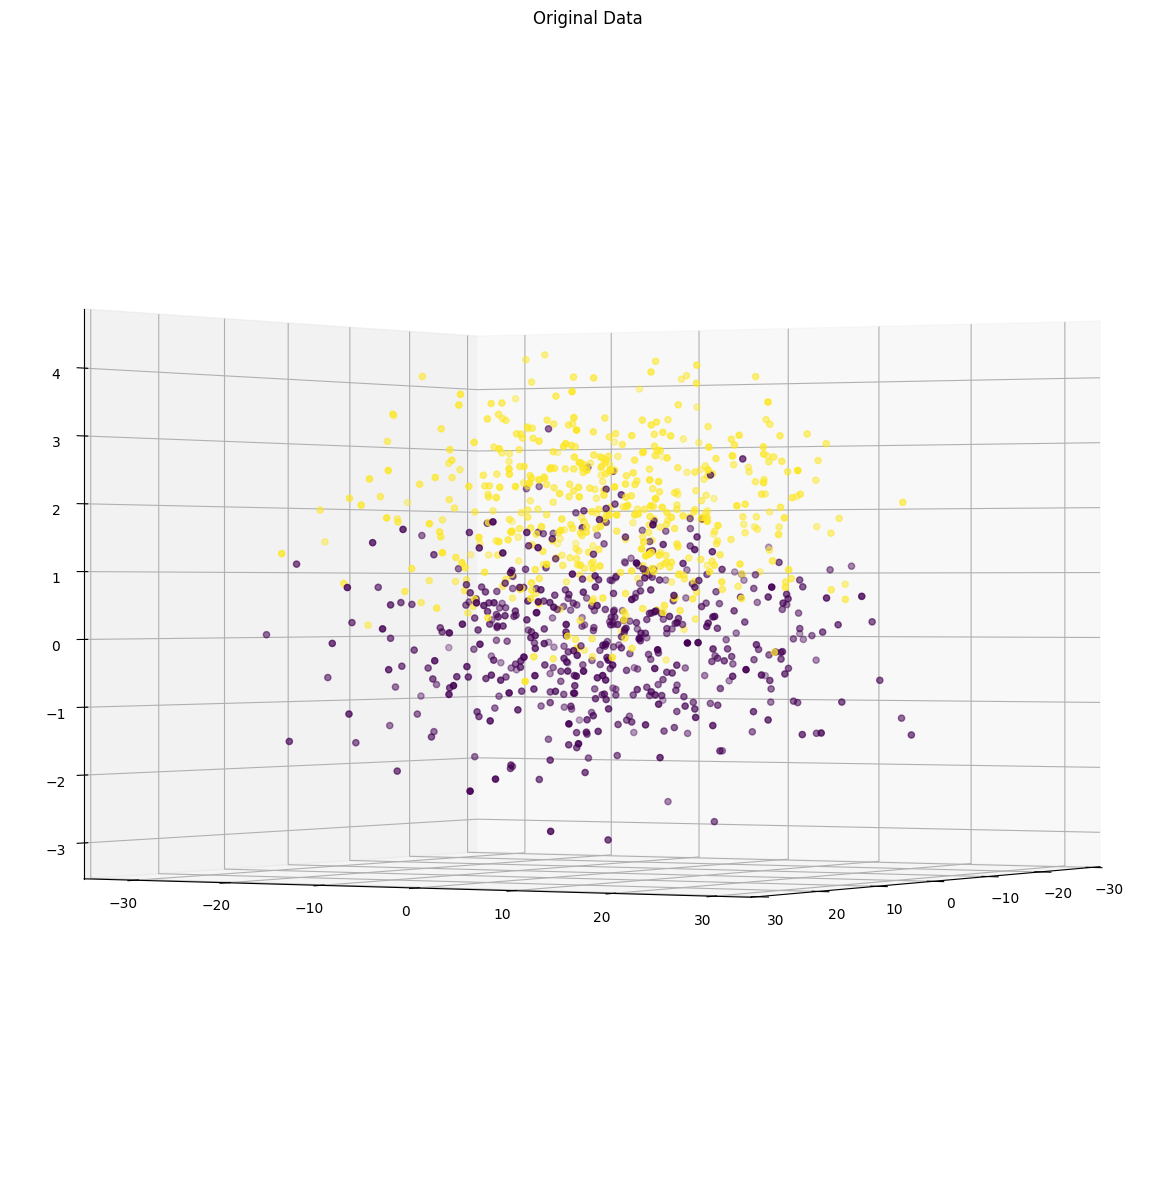

In [13]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [14]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

PCA (2D) Accuracy: 0.5050


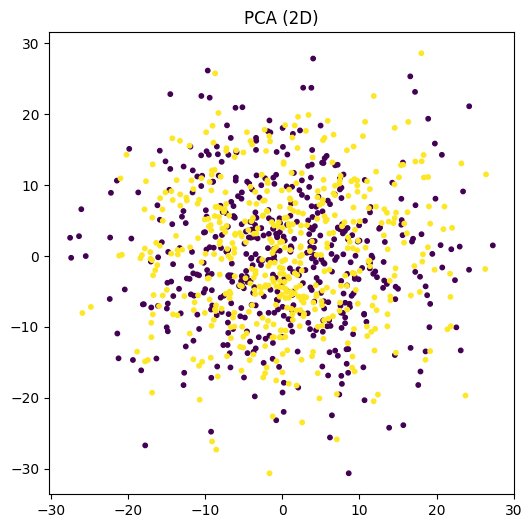

PCA (3D) Accuracy: 0.7250


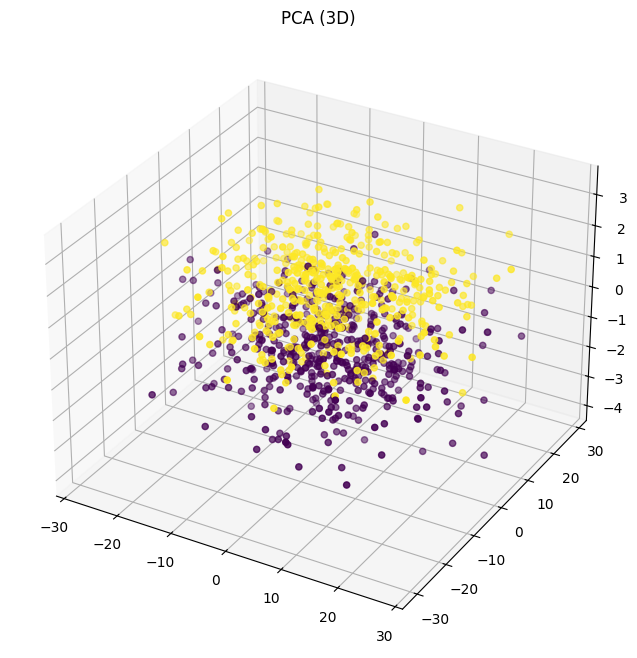

In [15]:
# Your code here
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try PCA with different dimensions
for n_comp in [2, 3]:
    pca = PCA(n_components=n_comp, random_state=42)
    X_pca = pca.fit_transform(X)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.2, random_state=42
    )

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"PCA ({n_comp}D) Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # Visualization
    if n_comp == 2:
        plt.figure(figsize=(6,6))
        plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", s=10)
        plt.title("PCA (2D)")
        plt.show()
    elif n_comp == 3:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap="viridis")
        ax.set_title("PCA (3D)")
        plt.show()




2. Try with UMAP.

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (2D) Accuracy: 0.6550


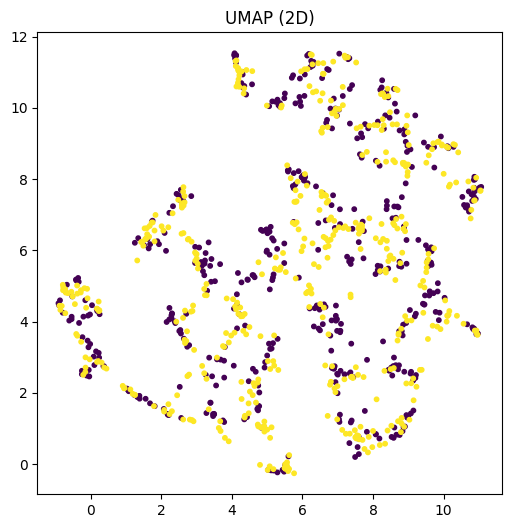

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP (3D) Accuracy: 0.6550


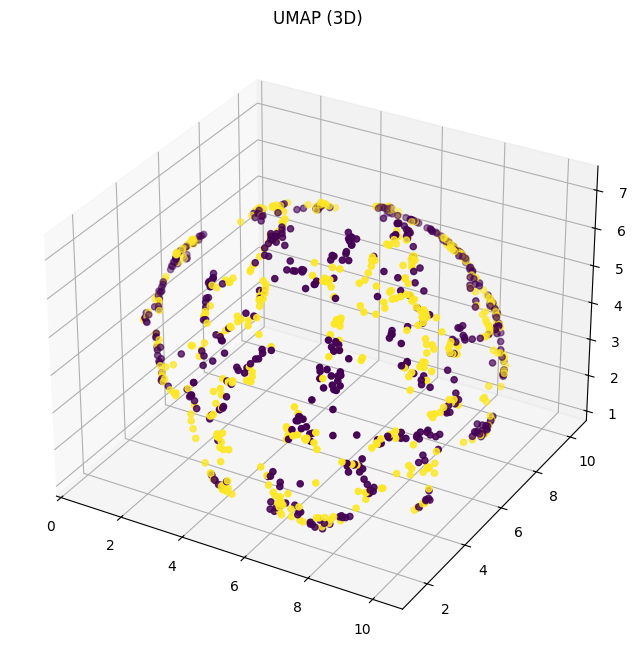

In [17]:
# Your code here

import umap.umap_ as umap

# Try UMAP with different parameters
for n_comp in [2, 3]:
    reducer = umap.UMAP(n_components=n_comp, n_neighbors=15, min_dist=0.1, random_state=42)
    X_umap = reducer.fit_transform(X)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_umap, y, test_size=0.2, random_state=42
    )

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"UMAP ({n_comp}D) Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # Visualization
    if n_comp == 2:
        plt.figure(figsize=(6,6))
        plt.scatter(X_umap[:,0], X_umap[:,1], c=y, cmap="viridis", s=10)
        plt.title("UMAP (2D)")
        plt.show()
    elif n_comp == 3:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], c=y, cmap="viridis")
        ax.set_title("UMAP (3D)")
        plt.show()



Explain your results in the cell below.  Which works better?  Why?

PCA maintains high accuracy because the classes are already linearly separable (z-shift), whereas,UMAP shows clear visual clusters but KNN accuracy depends on n_neighbors and min_dist. For classification, PCA works better and for visual exploration, UMAP is better.